# Assignment 4 ( Simple linear regression) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

# Q2

Salary_hike -> Build a prediction model for Salary_hike



In [2]:
df=pd.read_csv('salary_data.csv')

In [3]:

df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


# Perform exploratory data analysis (EDA)

In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [6]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


There is positive correlation between Salary Hike and Years of experience

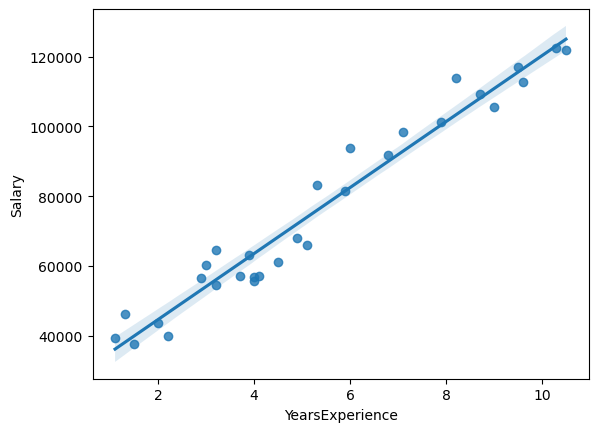

In [7]:
sns.regplot(x ='YearsExperience',y='Salary',data=df)
plt.show()

# Fitting a Linear Regression Model
Using Ordinary least squares (OLS) regression

OLS regression is a statistical technique that assumes a linear relationship between the dependent and independent variables

In [8]:
model=smf.ols('Salary~YearsExperience',data=df).fit()

In [9]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        20:05:16   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Variable transformations

In [10]:
model1=smf.ols('np.log(Salary)~np.log(	YearsExperience)', data=df).fit()

In [11]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           7.40e-16
Time:                        20:05:16   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  10.3280      0.056    184.868      0.000      10.214      10.442
np.log(YearsExperience)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
model2=smf.ols('np.sqrt(Salary)~np.sqrt(	YearsExperience)',data=df).fit()

In [13]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.sqrt(Salary)   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     454.3
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           7.58e-19
Time:                        20:05:16   Log-Likelihood:                -116.52
No. Observations:                  30   AIC:                             237.0
Df Residuals:                      28   BIC:                             239.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                  103.5680      8.178     12.663      0.000      86.815     120.321
np.sqrt(YearsExperience)    75.6269      3.548     21.315      0.000      68.359      82.895
==============================================================================
Omnibus:                        0.924   Durbin-Watson:                   1.362
Prob(Omnibus):                  0.630   Jarque-Bera (JB):                0.801
Skew:                           0.087   Prob(JB):                        0.670
Kurtosis:                       2.219   Cond. No.                         9.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
model3=smf.ols('np.cbrt(Salary)~np.cbrt(	YearsExperience)', data=df).fit()

In [15]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        np.cbrt(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     386.5
Date:                Mon, 12 Jun 2023   Prob (F-statistic):           6.37e-18
Time:                        20:05:16   Log-Likelihood:                -50.589
No. Observations:                  30   AIC:                             105.2
Df Residuals:                      28   BIC:                             108.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   16.6603      1.300     12.811      0.000      13.996      19.324
np.cbrt(YearsExperience)    14.8963      0.758     19.659      0.000      13.344      16.448
==============================================================================
Omnibus:                        0.386   Durbin-Watson:                   1.229
Prob(Omnibus):                  0.824   Jarque-Bera (JB):                0.535
Skew:                           0.070   Prob(JB):                        0.765
Kurtosis:                       2.361   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# model validation

In [16]:
model2.fittedvalues

0     182.886226
1     189.796000
2     196.191728
3     210.520663
4     215.740898
5     232.356055
6     234.557719
7     238.853599
8     238.853599
9     249.039339
10    252.919254
11    254.821894
12    254.821894
13    256.700896
14    263.996980
15    270.975381
16    274.357689
17    277.674303
18    287.265210
19    288.815425
20    300.778941
21    305.082231
22    316.132184
23    320.130606
24    326.635432
25    330.448826
26    336.665890
27    337.889509
28    346.282180
29    348.627298
dtype: float64

In [17]:
df['predicted_s']=model2.fittedvalues

In [18]:
df

,YearsExperience,Salary,predicted_s
0,1.1,39343.0,182.886226
1,1.3,46205.0,189.796000
2,1.5,37731.0,196.191728
3,2.0,43525.0,210.520663
4,2.2,39891.0,215.740898
5,2.9,56642.0,232.356055
6,3.0,60150.0,234.557719
7,3.2,54445.0,238.853599
8,3.2,64445.0,238.853599
9,3.7,57189.0,249.039339


In [19]:
predicted1 = pd.DataFrame() 
predicted1['YearsExperience'] = df.	YearsExperience
predicted1['Salary'] = df.Salary
predicted1['Predicted_salary'] = pd.DataFrame(model2.predict(predicted1.YearsExperience))**2
predicted1

,YearsExperience,Salary,Predicted_salary
0,1.1,39343.0,33447.371655
1,1.3,46205.0,36022.521569
2,1.5,37731.0,38491.193991
3,2.0,43525.0,44318.949727
4,2.2,39891.0,46544.135171
5,2.9,56642.0,53989.336270
6,3.0,60150.0,55017.323598
7,3.2,54445.0,57051.041838
8,3.2,64445.0,57051.041838
9,3.7,57189.0,62020.592218
